# Machine Learning Project
## Articles Analysis with Machine Learning

### Revisando a proposta

#### Background:

Todos os dias pesquisadores, estudantes de graduação, mestrado, doutorado, curiosos estão descobrindo e escrevendo sobre nossa visão do mundo, artigos sobre astronomia, psicologia, informática, engenharia mecânica, entre outros, questionam e encontram informações sobre pequenas, grandes, estranhas, importantes ou inúteis descobertas. Se separarmos uma certa área específica, será que uma pessoa é capaz de ler, entender, conversar com os autores daquele assunto? Num mundo tão grande, com uma produção tão vasta, é difícil.

Em 2011, por exemplo, os pesquisadores brasileiros publicaram 49.664 artigos 2, olhando o mapa acima, talvez no mesmo ano, os Estados Unidos tenham publicado cerca de 20 vezes mais. Mas a disputa aqui não é sobre quem publica mais, mas sim, sobre seria possível consumir uma quantidade grande de produção científica.

O trabalho acadêmico tem por critério de qualidade, geralmente, a originalidade do trabalho, os pesquisadores citam em seus projetos descobertas originais, ou aplicação de métodos em novos tipos de dados, entre outras maneiras, porém de alguma forma estes pesquisadores estão ligados, por seus assuntos ou por métodos utilizados, o mundo científico também adotou a interdisciplinaridade, por vezes alguns artigos de medicina irão usar técnicas de ciências da computação ou matemática para comprovar uma descoberta, a arte pode usar a física, a física pode usar a psicologia.

Então se alguém escreve, ou se vai escrever sobre um assunto, quem são as outras pessoas da área dela, ou não, que estão produzindo sobre assuntos que dividem características com as essas publicações, se uma universidade ou revista quiser saber quais autores tem mais similaridade nos métodos usados, ou nos dados pesquisados, como unir essa informação sem ter que ler toda a volumosa produção científica que o mundo produz?

#### Problema e Justificativa:

Analisar em que revistas este artigo tem mais probabilidade de sucesso de aceitação, sabendo quais grupos as revistas mais publicam. Este algoritmo poderia ser o mesmo utilizado para agrupar os dados, no entanto, para explorar mais ferramentas de aprendizado de máquina, será utilizado um algoritmo para classificação, utilizando como variável alvo o grupo encontrado na etapa de agrupamento. 

#### Solução Proposta:

A solução e objetivos propostos são:
Utilizar processamento de linguagem natural para ler resumos de artigos científicos e encontrar palavras importantes para classificar seus autores;
Clusterizar os autores e revistas onde os artigos foram publicados para encontrar grupos naturalmente formados;
Prever a possibilidade de um autor fazer parte de um grupo de autores ou de publicar em uma revista;

(O autor propôs esta solução para utilizar aprendizagem supervisionada e não supervisionada no exercício final).

#### Solução Proposta pelo Orientador:

Criar um algortimo de aprendizagem supervisionada e já utilizar as revistas como variável alvo, sem a necessidade de realizar clusterização.

### Iniciando o projeto

Alguns pacotes foram criados para auxiliar a execução do projeto, os mesmos podem ser acessados no diretório do github, todas as classes e scripts criados possuem docstring para detalhar a utilização dos mesmos. O objetivo era deixar no notebook apenas as partes mais importantes.

### Conjunto de dados e inputs

Os artigos foram coletados, manualmente, no site (https://www.ncbi.nlm.nih.gov/pubmed/). No entanto, em vez de utilizar os artigos no formato .nbib, como ideaizado no projeto, será utilizado arquivos .xml.

Eles estão no idioma inglês, para evitar erros de viés durante a elaboração dos algoritmos, todos os artigos deste website são sobre medicina, de modo que possamos reduzir o grupo de observação e não coletar dados extremamente distantes que não sejam efetivos no momento da construção do algoritmo.

In [40]:
import numpy as np
import pandas as pd

import os
import glob
import xml.etree.ElementTree

# Important nltk packages you might download to execute the codes
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('stopwords')

%matplotlib inline
import matplotlib.pyplot as plt

from custom_entities.article import ArticleData
from custom_helpers.pandas_helper import insert_article_to_pandas

# Path of folder with all articles
# path = 'C:/Users/Paulo/Documents/PyCharmProjects/papers_abstract_analysis/papers'
path = 'C:/Users/Paulo Henrique/PycharmProjects/papers_abstract_analysis/papers'

df = pd.DataFrame()

for filename in glob.glob(os.path.join(path, '*.xml')):
    root = xml.etree.ElementTree.parse(filename).getroot()
    article = ArticleData(root)
    df = insert_article_to_pandas(df, article)
    
df = df.fillna(0)

n_articles = len(df.index)
n_features = len(df.columns) - 1
# Imprime os resultados
print "Número total de artigos: {}".format(n_articles)
print "Número de atributos: {}\n".format(n_features)

current_columns = []

for index, row in (df.groupby(['.JOURNAL']).count()).iterrows():
    current_columns.append(index)
    print index, row[0]

result_df = pd.DataFrame(columns=current_columns)

Número total de artigos: 124
Número de atributos: 491

Basic & clinical pharmacology & toxicology 17
Child psychiatry and human development 15
Clinical psychology & psychotherapy 20
Drug and alcohol dependence 17
Journal of affective disorders 20
Neuropharmacology 17
Psychiatry investigation 18


## Classificador com revista como variável alvo
### Separação da variável alvo

Inicialmente será criado um classificador usando as revistas como variváveis alvo.

In [41]:
# Extrair coluna de atributos
feature_cols = list(df.columns[1:])

# Extrair coluna alvo
target_col = df.columns[0] 

# Mostre a lista de colunas
print "Colunas de atributos (Primeiras 40):\n{}".format(feature_cols[0:40])
print "\nColuna-alvo: {}".format(target_col)

# Separação do data_set de atributos e alvo
X_all = df[feature_cols]
y_all = df[target_col]

Colunas de atributos (Primeiras 40):
['abstin', 'access', 'accommod', 'acetaminophen', 'across', 'action', 'activ', 'addict', 'adolesc', 'adrenerg', 'adult', 'adulthood', 'affair', 'affect', 'agent', 'aggress', 'alcohol', 'alexithymia', 'allianc', 'almost', 'although', 'aluminium', 'amazon', 'ambival', 'among', 'analges', 'analysi', 'androstan', 'anesthet', 'anti-epilept', 'antibiot', 'antidepress', 'anxieti', 'anxiou', 'apach', 'aptam', 'arson', 'assert', 'assess', 'associ']

Coluna-alvo: .JOURNAL


### Divisão dos Dados de Treinamento e Teste

Embaralhar aleatoriamente os dados (X_all, y_all) em subconjuntos de treinamento e teste.
    > Utilizar 75% de dados em treinamento 25% em teste.
    > Armazenar os resultados em X_train, X_test, y_train e y_test.

In [42]:
# Importar divisor de amostra
from sklearn.cross_validation import train_test_split

# teste
num_test = 10
custom_random_state = 32

# Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=custom_random_state)

# Mostre o resultado da distribuição
print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])

O conjunto de treinamento tem 114 amostras.
O conjunto de teste tem 10 amostras.


### Utilidades para ajustar treinamento

Implemtanção de métodos para auxiliar o treinamento e visão de resultados

In [43]:
#implemtação de codigo para imprimir o markdown sozinho :)
from time import time
from sklearn.metrics import accuracy_score

global col_1
global col_2
global col_3
global col_4
global col_5
col_1 = 'Tamanho do Conj de Treinamento'
col_2 = 'Tempo de Treinamento'
col_3 = 'Tempo de Estimativa (teste)'
col_4 = 'Pontuacao Accuracy (treinamento)'
col_5 = 'Pontuacao Accuracy (teste)'

global df_model
df_model = pd.DataFrame(columns=[col_1, col_2, col_3, col_4, col_5])
df_backup = df_model.copy()

def pandas_df_to_markdown_table(df):
    '''
    Função para tabular com markdown.
    Creditos para o autor na publicação abaixo.
    Acessado em https://stackoverflow.com/questions/33181846/programmatically-convert-pandas-dataframe-to-markdown-table
    '''
    from IPython.display import Markdown, display
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))

In [44]:
def train_classifier(clf, X_train, y_train, index=None):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print "O modelo foi treinado em {:.4f} segundos".format(end - start)
    if index:
        df_model.loc[index,col_2] = "{:.4f} seg".format(end - start)

    
def predict_labels(clf, features, target, index=None):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print "As previsões foram feitas em {:.4f} segundos.".format(end - start)
    if index:
        df_model.loc[index, col_3] = "{:.4f} seg".format(end - start)
    
    return accuracy_score(target.values, y_pred)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    index = len(X_train)
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print "Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, index)
    df_model.loc[index, col_1] = index
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train, index)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    time_train = predict_labels(clf, X_train, y_train, index)
    time_test = predict_labels(clf, X_test, y_test, index)
    print "Pontuação accuracy_score para o conjunto de treino: {:.4f}.".format(time_train)
    print "Pontuação accuracy_score para o conjunto de teste: {:.4f}.".format(time_test)
    df_model.loc[index, col_4] = "{:.4f}.".format(time_train)
    df_model.loc[index, col_5] = "{:.4f}.".format(time_test)

### Métricas de Desempenho do Modelo

Implemtanção de métodos para auxiliar o treinamento e visão de resultados.

In [45]:
# Importar três modelos de aprendizagem supervisionada do sklearn
# from sklearn import model_A
from sklearn.linear_model import LogisticRegression
# from sklearn import model_B
from sklearn.tree import DecisionTreeClassifier
# from skearln import model_C
from sklearn.svm import SVC

# TODO: Inicialize os três modelos
clf_A = LogisticRegression(random_state=custom_random_state)
clf_B = DecisionTreeClassifier(random_state=custom_random_state)
clf_C = SVC(random_state=custom_random_state)

# Cria array de classificadores e dataframe de resultados
clfs = [clf_A, clf_B, clf_C]
df_A = None
df_B = None
df_C = None
dfs = [df_A, df_B, df_C]

# Executar a função 'train_predict' para cada classificador e cada tamanho de conjunto de treinamento
# train_predict(clf, X_train, y_train, X_test, y_test)
for i, x in enumerate(clfs):
    train_predict(clfs[i], X_train, y_train, X_test, y_test)
    print ''
    dfs[i] = df_model.copy()
    df_model = df_backup.copy()

Treinando um LogisticRegression com 114 pontos de treinamento. . .
O modelo foi treinado em 0.0070 segundos
As previsões foram feitas em 0.0010 segundos.
As previsões foram feitas em 0.0010 segundos.
Pontuação accuracy_score para o conjunto de treino: 0.9649.
Pontuação accuracy_score para o conjunto de teste: 0.4000.

Treinando um DecisionTreeClassifier com 114 pontos de treinamento. . .
O modelo foi treinado em 0.0050 segundos
As previsões foram feitas em 0.0000 segundos.
As previsões foram feitas em 0.0000 segundos.
Pontuação accuracy_score para o conjunto de treino: 0.9825.
Pontuação accuracy_score para o conjunto de teste: 0.3000.

Treinando um SVC com 114 pontos de treinamento. . .
O modelo foi treinado em 0.0140 segundos
As previsões foram feitas em 0.0070 segundos.
As previsões foram feitas em 0.0010 segundos.
Pontuação accuracy_score para o conjunto de treino: 0.2719.
Pontuação accuracy_score para o conjunto de teste: 0.2000.



In [46]:
#Exibindo tabelas automaticamente
for i, x in enumerate(clfs):
    print '\033[1m' + '\033[4m' + "\nClassificador " + str(i+1) + ' - ' + clfs[i].__class__.__name__ + '\033[0m'
    pandas_df_to_markdown_table(dfs[i])


Classificador 1 - LogisticRegression


Tamanho do Conj de Treinamento|Tempo de Treinamento|Tempo de Estimativa (teste)|Pontuacao Accuracy (treinamento)|Pontuacao Accuracy (teste)
---|---|---|---|---
114|0.0070 seg|0.0010 seg|0.9649.|0.4000.



Classificador 2 - DecisionTreeClassifier


Tamanho do Conj de Treinamento|Tempo de Treinamento|Tempo de Estimativa (teste)|Pontuacao Accuracy (treinamento)|Pontuacao Accuracy (teste)
---|---|---|---|---
114|0.0050 seg|0.0000 seg|0.9825.|0.3000.



Classificador 3 - SVC


Tamanho do Conj de Treinamento|Tempo de Treinamento|Tempo de Estimativa (teste)|Pontuacao Accuracy (treinamento)|Pontuacao Accuracy (teste)
---|---|---|---|---
114|0.0140 seg|0.0010 seg|0.2719.|0.2000.


### Calibrando o Melhor Modelo

In [47]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

# Novo embaralhamento para busca de parametros
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_all, y_all, test_size=num_test, random_state=custom_random_state)

# TODO: Crie a lista de parâmetros que você gostaria de calibrar
C = range(1, 10)
class_weight = ['balanced', None]
parameters = {'C': C,
              'class_weight': class_weight}

# TODO: Inicialize o classificador
clf = LogisticRegression(random_state=custom_random_state)

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(accuracy_score)

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer, cv=5, verbose=0)

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj.fit(X_train_cv, y_train_cv)

# Get the estimator
clf = grid_obj.best_estimator_

# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetros
tuned_f1_train = "{:.4f}".format(predict_labels(clf, X_train, y_train))
tuned_f1_test = "{:.4f}".format(predict_labels(clf, X_test, y_test))
print "\nO modelo calibrado tem Accuracy de " + tuned_f1_train + " no conjunto de treinamento."
print "O modelo calibrado tem Accuracy de " + tuned_f1_test + " no conjunto de teste."

print "\nMelhores parametros:"
print "C = " + str(grid_obj.best_params_['C'])
print "class_weight = " + str(grid_obj.best_params_['class_weight'])

df_tuned = dfs[0].copy()
df_tuned.loc[:, col_4] = tuned_f1_train
df_tuned.loc[:, col_5] = tuned_f1_test

As previsões foram feitas em 0.0010 segundos.
As previsões foram feitas em 0.0000 segundos.

O modelo calibrado tem Accuracy de 0.9649 no conjunto de treinamento.
O modelo calibrado tem Accuracy de 0.4000 no conjunto de teste.

Melhores parametros:
C = 1
class_weight = balanced


In [48]:
print '\033[1m' + '\033[4m' + "\nAntes: " + clf.__class__.__name__ + '\033[0m'
pandas_df_to_markdown_table(dfs[1].loc[:,[col_1, col_4, col_5]])

print '\033[1m' + '\033[4m' + "\nDepois: " + clf.__class__.__name__ + '\033[0m'
pandas_df_to_markdown_table(df_tuned.loc[:,[col_1, col_4, col_5]])


Antes: LogisticRegression


Tamanho do Conj de Treinamento|Pontuacao Accuracy (treinamento)|Pontuacao Accuracy (teste)
---|---|---
114|0.9825.|0.3000.



Depois: LogisticRegression


Tamanho do Conj de Treinamento|Pontuacao Accuracy (treinamento)|Pontuacao Accuracy (teste)
---|---|---
114|0.9649|0.4000


### Analisando um artigo


In [49]:
preds = clf.predict_proba(X_test)

for i, x in enumerate(preds):
    for r, y in enumerate(result_df.columns):
        result_df.loc[X_test.index[i], result_df.columns[r]] = preds[i][r]
    
display(result_df)

,Basic & clinical pharmacology & toxicology,Child psychiatry and human development,Clinical psychology & psychotherapy,Drug and alcohol dependence,Journal of affective disorders,Neuropharmacology,Psychiatry investigation
10.1111/bcpt.12993,0.125536,0.0768155,0.351774,0.0944865,0.0847408,0.124224,0.142422
10.1016/j.drugalcdep.2017.12.011,0.127419,0.0784315,0.106439,0.370557,0.0893853,0.128691,0.0990775
10.1111/bcpt.12996,0.125536,0.0768155,0.351774,0.0944865,0.0847408,0.124224,0.142422
10.1016/j.jad.2018.02.036,0.0648422,0.155424,0.217253,0.0533491,0.366783,0.0838562,0.0584917
10.30773/pi.2017.06.25,0.110933,0.116113,0.160437,0.092552,0.107292,0.153235,0.259437
10.30773/pi.2017.06.07,0.177128,0.103544,0.137864,0.141699,0.125066,0.173892,0.140807
10.1002/cpp.2172,0.08811,0.054104,0.44174,0.139613,0.0939596,0.0832956,0.0991785
10.1111/bcpt.12994,0.165861,0.0926706,0.124982,0.158042,0.173807,0.160001,0.124636
10.1016/j.drugalcdep.2018.01.006,0.177128,0.103544,0.137864,0.141699,0.125066,0.173892,0.140807
10.1016/j.neuropharm.2018.02.031,0.0739497,0.0672603,0.0743332,0.420671,0.0537911,0.177277,0.132718


### Entendimento dos Resultados

O artigo abaixo, dentro das predições, teve sucesso no resultado.

In [50]:
show_article = None
for filename in glob.glob(os.path.join(path, '*.xml')):
    root = xml.etree.ElementTree.parse(filename).getroot()
    article = ArticleData(root)
    if(article.doi == result_df.index[3]):
        show_article = article
        break
        
print('DOI:      ' + article.doi)
print('PUB DATE: ' + article.pub_date)
print('JOURNAL:  ' + article.journal.title)
print('TITLE:    ' + article.article_title)
print('ABSTRACT: ' + article.abstract_text)

DOI:      10.1016/j.jad.2018.02.036
PUB DATE: 28/Feb/2018
JOURNAL:  Journal of affective disorders
TITLE:    The prevalence and correlates of severe depression in a cohort of Mexican teachers.
ABSTRACT: 
Depression is among the 10 major causes of disability in Mexico. Yet, local contextual factors associated to the disorder remain poorly understood. We measured the impact of several factors on severe depression such as demographics, pharmacotherapy, multimorbidity, and unhealthy behaviors in Mexican teachers.
A total of 43,845 Mexican female teachers from 12 Mexican states answered the Patient Health Questionnaire (PHQ9). Data were part the Mexican Teacher's Cohort prospective study, the largest ongoing cohort study in Latin America. Unadjusted and adjusted estimates assessed the impact of several contextual factors between severe versus mild-no depression cases.
In total 7026 teachers (16%) had a PHQ9 score compatible with severe depression. From them, only 17% received psychotropics,

### Redução de Dimensionalidade


In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca.fit(X_all)

reduced_data = pca.transform(X_all)
pca_samples = pca.transform(X_test)
print("Variância dos 7 primeiros componentes:")
print(np.cumsum(pca.explained_variance_ratio_))
print("Os 7 componentes representam " + str(sum(np.cumsum(pca.explained_variance_ratio_))) + "% da variância total")

reduced_data = pd.DataFrame(reduced_data, columns = ['Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6', 'Dim 7'])
reduced_data.head(5)

Variância dos 7 primeiros componentes:
[ 0.03851299  0.07224977  0.10255487  0.12710628  0.14979802  0.17123305
  0.19130506]
Os 7 componentes representam 0.852760048633% da variância total


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7
0,-0.383947,0.112655,0.722171,-0.322698,-0.133738,-0.162509,-0.011725
1,0.918519,-0.640690,-0.130259,0.024689,-0.210888,-0.356664,0.102847
2,-0.379016,-0.152145,-0.185534,0.240772,-0.337908,0.043962,0.013607
3,-0.343794,-0.260228,-0.123426,0.372853,-0.491186,0.463663,0.171631
4,-0.240803,-0.060344,-0.147540,0.028745,-0.065772,-0.108370,-0.033234


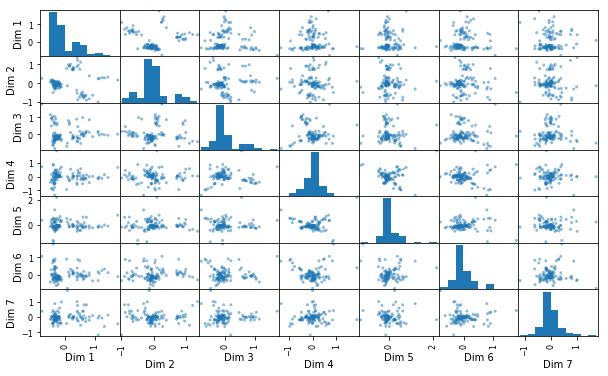

In [52]:
pd.plotting.scatter_matrix(reduced_data, figsize = (10,6));

In [53]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters = [5, 6, 7, 8, 9]
scores = []
score = 0

for n_cluster in clusters:
    # TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
    clusterer = GaussianMixture(n_components = n_cluster, random_state = 35)
    clusterer.fit(reduced_data)
    
    # TODO: Preveja o cluster para cada ponto de dado
    preds = clusterer.predict(reduced_data)

    # TODO: Ache os centros do cluster
    centers = clusterer.means_

    # TODO: Preveja o cluster para cada amostra de pontos de dado transformados
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
    current_score = silhouette_score(reduced_data,preds)    
    scores.append(current_score)


for index in range(len(clusters)):
    print 'Numero de cluster: ' + str(clusters[index]) + ' score: ' + str(scores[index])

# refazendo com o melhor Score
clusterer = GaussianMixture(n_components = 8, random_state = 35)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = scores[3]
print '\nMelhor Score: ' + str(score)

Numero de cluster: 5 score: 0.305383342073
Numero de cluster: 6 score: 0.354630535747
Numero de cluster: 7 score: 0.269748677378
Numero de cluster: 8 score: 0.423426297449
Numero de cluster: 9 score: 0.418020165928

Melhor Score: 0.423426297449


In [62]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import pca

def cluster_results(reduced_data, preds, centers, pca_samples):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dim 6', y = 'Dim 7', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
               s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

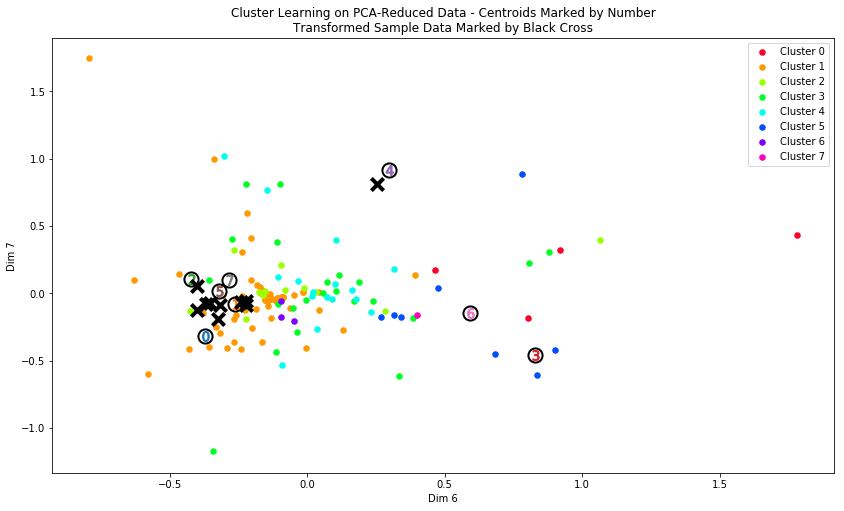

In [63]:
cluster_results(reduced_data, preds, centers, pca_samples)

In [64]:
counter = 0
for index, row in result_df.iterrows():
    result_df.loc[index, 'GROUP'] = sample_preds[counter]
    counter = counter + 1
    
display(result_df)

,Basic & clinical pharmacology & toxicology,Child psychiatry and human development,Clinical psychology & psychotherapy,Drug and alcohol dependence,Journal of affective disorders,Neuropharmacology,Psychiatry investigation,GROUP
10.1111/bcpt.12993,0.125536,0.0768155,0.351774,0.0944865,0.0847408,0.124224,0.142422,5.0
10.1016/j.drugalcdep.2017.12.011,0.127419,0.0784315,0.106439,0.370557,0.0893853,0.128691,0.0990775,1.0
10.1111/bcpt.12996,0.125536,0.0768155,0.351774,0.0944865,0.0847408,0.124224,0.142422,5.0
10.1016/j.jad.2018.02.036,0.0648422,0.155424,0.217253,0.0533491,0.366783,0.0838562,0.0584917,4.0
10.30773/pi.2017.06.25,0.110933,0.116113,0.160437,0.092552,0.107292,0.153235,0.259437,1.0
10.30773/pi.2017.06.07,0.177128,0.103544,0.137864,0.141699,0.125066,0.173892,0.140807,1.0
10.1002/cpp.2172,0.08811,0.054104,0.44174,0.139613,0.0939596,0.0832956,0.0991785,5.0
10.1111/bcpt.12994,0.165861,0.0926706,0.124982,0.158042,0.173807,0.160001,0.124636,1.0
10.1016/j.drugalcdep.2018.01.006,0.177128,0.103544,0.137864,0.141699,0.125066,0.173892,0.140807,1.0
10.1016/j.neuropharm.2018.02.031,0.0739497,0.0672603,0.0743332,0.420671,0.0537911,0.177277,0.132718,1.0


In [65]:
show_article = None
for filename in glob.glob(os.path.join(path, '*.xml')):
    root = xml.etree.ElementTree.parse(filename).getroot()
    article = ArticleData(root)
    if(article.doi == result_df.index[3]):
        show_article = article
        break
        
print('DOI:      ' + article.doi)
print('PUB DATE: ' + article.pub_date)
print('JOURNAL:  ' + article.journal.title)
print('TITLE:    ' + article.article_title)
print('ABSTRACT: ' + article.abstract_text)

DOI:      10.1016/j.jad.2018.02.036
PUB DATE: 28/Feb/2018
JOURNAL:  Journal of affective disorders
TITLE:    The prevalence and correlates of severe depression in a cohort of Mexican teachers.
ABSTRACT: 
Depression is among the 10 major causes of disability in Mexico. Yet, local contextual factors associated to the disorder remain poorly understood. We measured the impact of several factors on severe depression such as demographics, pharmacotherapy, multimorbidity, and unhealthy behaviors in Mexican teachers.
A total of 43,845 Mexican female teachers from 12 Mexican states answered the Patient Health Questionnaire (PHQ9). Data were part the Mexican Teacher's Cohort prospective study, the largest ongoing cohort study in Latin America. Unadjusted and adjusted estimates assessed the impact of several contextual factors between severe versus mild-no depression cases.
In total 7026 teachers (16%) had a PHQ9 score compatible with severe depression. From them, only 17% received psychotropics,

### FIM

Resultados serão discutidos no relatório.
